<a href="https://colab.research.google.com/github/emkcosta/KillifishAtlas/blob/main/06_AgingClocks/EN_validation_ALDR_250121.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Title: EN_validation_ALDR_250121.ipynb
# Author: Lajoyce Mboning
# Edited/reviewed by: Emma K. Costa, Nimrod Rappoport
# Date:2024
# Related publication: Emma K. Costa, and Jingxun Chen, In prep.


# Description - run Elastic Net on the ALDR query dataset

# Set-Up

In [ ]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
#from sklearn.linear_model import LassoCV
from numpy import arange
from numpy import absolute
from numpy import mean
from numpy import std
import numpy as np
from scipy import stats
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm
from scipy.stats import spearmanr
lowess = sm.nonparametric.lowess
from scipy.stats import poisson
from scipy.stats import pearsonr
from datetime import datetime
import time
from scipy.stats import mannwhitneyu
from statsmodels.stats.multitest import multipletests
from numpy import mean
from numpy import std
from numpy import absolute
import pandas as pd
# use automatically configured elastic net algorithm
from numpy import arange
from sklearn.model_selection import cross_val_score
#from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import ElasticNet
#from sklearn.linear_model import ElasticNet
from sklearn.model_selection import RepeatedKFold, cross_val_predict
from sklearn.metrics import mean_absolute_error, r2_score
from scipy.stats import pearsonr
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import LeaveOneOut
import matplotlib.pyplot as plt
import statsmodels.api as sm
lowess = sm.nonparametric.lowess
from sklearn.model_selection import GridSearchCV
import seaborn as sns
from scipy import stats

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.chdir("/content/drive/My Drive/african_killifish_atlas/Code_check")

### Load the data

In [ ]:
df_cr = pd.read_csv("./Data_from_Others/ALDR/GSE216369_CountsNormDESeq2_Liver_ALDR_220331.csv")

df_cr.head(5)

,f_AL_L_1,m_AL_L_1,m_DR_L_1,f_AL_L_2,f_DR_L_1,m_AL_L_2,m_DR_L_2,f_DR_L_2,f_AL_L_3,m_DR_L_3,f_AL_L_4,f_DR_L_3,m_AL_L_3,m_DR_L_4,f_DR_L_4,m_AL_L_4
LOC107375582,1.065663,1.024315,0.951840,1.682535,0.826384,0.980873,2.279668,1.071467,1.053069,3.387973,1.044274,1.253454,0.920191,0.822090,1.170773,0.962468
LOC107388276,1.065663,6.145888,0.951840,1.682535,0.826384,0.980873,0.759889,1.071467,1.053069,1.129324,1.044274,1.253454,2.760574,0.822090,1.170773,6.737274
LOC107382448,2.131327,1.024315,0.951840,1.682535,0.826384,0.980873,0.759889,1.071467,1.053069,1.129324,1.044274,1.253454,0.920191,0.822090,1.170773,0.962468
LOC107377727,188.622436,35.851012,16.181281,11.777742,15.701294,26.483570,11.398339,39.644275,35.804344,5.646621,109.648747,43.870890,0.920191,2.466270,71.417142,28.874033
pex1,152.389878,382.069355,357.891867,215.364425,376.831063,225.600785,373.865526,259.294991,354.884231,348.961172,296.573754,304.589324,221.766100,307.461626,313.767115,336.863721


In [ ]:
df_cr = df_cr.T

df_cr.head(3)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107393324,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,3.196990,1459.958969,1.065663,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,1.024315,2692.923145,1.024315,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,0.951840,2039.793274,0.951840,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682


In [ ]:
# Check for any zero entries
has_zero = (df_cr == 0).any().any()

print("Does the matrix contain zero entries?", has_zero)

Does the matrix contain zero entries? False


In [ ]:
df_cr_age = df_cr.copy()

In [ ]:
df_cr_age["treatment"] = ''
df_cr_age["tissue"] = ''
df_cr_age.loc[df_cr_age.index.str.contains("AL"), "treatment"] = "AL"
df_cr_age.loc[df_cr_age.index.str.contains("DR"), "treatment"] = "DR"
df_cr_age.loc[df_cr_age.index.str.contains("BR"), "tissue"] = "Brain"
# Step 4: Assign "Liver" to all rows where the tissue is not "Brain"
df_cr_age.loc[df_cr_age["tissue"] != "Brain", "tissue"] = "Liver"

In [ ]:
df_cr_age_liver = df_cr_age[df_cr_age["tissue"] == "Liver"]

df_cr_age_liver.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,1.065663,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,AL,Liver
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,1.024315,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607,AL,Liver
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,0.951840,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682,DR,Liver
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1.682535,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,AL,Liver
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,0.826384,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,DR,Liver


In [ ]:
df_cr_age_liver.loc[:, "sex"] = ''

df_cr_age_liver.loc[df_cr_age_liver.index.str.startswith("f"), "sex"] = "f"
df_cr_age_liver.loc[df_cr_age_liver.index.str.startswith("m"), 'sex'] = "m"

df_cr_age_liver.head(10)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,AL,Liver,f
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607,AL,Liver,m
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682,DR,Liver,m
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,AL,Liver,f
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,DR,Liver,f
m_AL_L_2,0.980873,0.980873,0.980873,26.483570,225.600785,10.789603,2.942619,117.704757,297.204512,2504.168709,...,788.621873,0.980873,470.819029,22.560078,18.636587,6.866111,60.814125,AL,Liver,m
m_DR_L_2,2.279668,0.759889,0.759889,11.398339,373.865526,53.952139,17.477453,96.505939,227.206895,2452.922597,...,834.358430,12.918118,568.397182,6.839004,34.195018,8.358782,23.556568,DR,Liver,m
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084,DR,Liver,f
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136,AL,Liver,f
m_DR_L_3,3.387973,1.129324,1.129324,5.646621,348.961172,21.457159,1.129324,105.027149,272.167128,1176.755797,...,682.111806,1.129324,457.376293,3.387973,7.905269,16.939863,28.233105,DR,Liver,m


In [ ]:
df_cr_age_liver.shape

(16, 22622)

In [ ]:
df_cr_age_liver_raw_counts = df_cr_age_liver.iloc[:,:-3]

df_cr_age_liver_raw_counts.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107393324,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,3.196990,1459.958969,1.065663,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,1.024315,2692.923145,1.024315,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,0.951840,2039.793274,0.951840,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1.682535,5838.394970,1.682535,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,0.826384,1765.982416,0.826384,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143


In [ ]:
df_cr_age_liver_raw_counts_female = df_cr_age_liver[df_cr_age_liver["sex"] == "f"]

df_cr_age_liver_raw_counts_female.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,AL,Liver,f
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,AL,Liver,f
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,DR,Liver,f
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084,DR,Liver,f
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136,AL,Liver,f


In [ ]:
df_cr_age_liver_raw_counts_freq_female = df_cr_age_liver_raw_counts_female.iloc[:,:-3]

df_cr_age_liver_raw_counts_freq_female = df_cr_age_liver_raw_counts_freq_female.div(df_cr_age_liver_raw_counts_freq_female.sum(axis=1), axis=0)

df_cr_age_liver_raw_counts_freq_female.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107393324,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249
f_AL_L_1,3.230766e-08,3.230766e-08,6.461532e-08,5.718456e-06,0.000005,2.907689e-07,3.230766e-08,3.069228e-06,0.000012,0.000027,...,9.692298e-08,0.000044,3.230766e-08,0.000025,9.692298e-08,0.000018,3.230766e-08,6.784609e-07,1.259999e-06,2.519997e-06
f_AL_L_2,3.253455e-08,3.253455e-08,3.253455e-08,2.277418e-07,0.000004,9.760364e-08,9.760364e-08,6.181564e-07,0.000009,0.000015,...,3.253455e-08,0.000113,3.253455e-08,0.000021,9.760364e-08,0.000006,3.253455e-08,8.784327e-07,1.626727e-07,8.133636e-07
f_DR_L_1,2.982496e-08,2.982496e-08,2.982496e-08,5.666742e-07,0.000014,1.163173e-06,2.982496e-08,4.443918e-06,0.000007,0.000095,...,2.982496e-08,0.000064,2.982496e-08,0.000090,2.982496e-08,0.000014,5.070243e-07,5.070243e-07,4.473743e-07,4.771993e-07
f_DR_L_2,3.037538e-08,3.037538e-08,3.037538e-08,1.123889e-06,0.000007,7.593846e-07,3.037538e-08,4.404430e-06,0.000008,0.000053,...,3.037538e-08,0.000050,3.037538e-08,0.000058,2.126277e-07,0.000009,2.733784e-07,6.378830e-07,1.518769e-07,2.217403e-06
f_AL_L_3,2.880820e-08,2.880820e-08,2.880820e-08,9.794788e-07,0.000010,2.592738e-07,1.440410e-07,3.255327e-06,0.000006,0.000044,...,2.880820e-08,0.000141,2.880820e-08,0.000035,1.440410e-07,0.000011,3.168902e-07,7.202050e-07,2.016574e-07,1.728492e-06


In [ ]:
df_cr_liver_raw_counts_female_without_metadata = df_cr_age_liver_raw_counts_female.iloc[:,:-3]

# Data Preparation

### Prepare Male Data

In [ ]:
df_cr_age_liver_male = df_cr_age_liver[df_cr_age_liver["sex"] == "m"]

df_cr_age_liver_male.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607,AL,Liver,m
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682,DR,Liver,m
m_AL_L_2,0.980873,0.980873,0.980873,26.483570,225.600785,10.789603,2.942619,117.704757,297.204512,2504.168709,...,788.621873,0.980873,470.819029,22.560078,18.636587,6.866111,60.814125,AL,Liver,m
m_DR_L_2,2.279668,0.759889,0.759889,11.398339,373.865526,53.952139,17.477453,96.505939,227.206895,2452.922597,...,834.358430,12.918118,568.397182,6.839004,34.195018,8.358782,23.556568,DR,Liver,m
m_DR_L_3,3.387973,1.129324,1.129324,5.646621,348.961172,21.457159,1.129324,105.027149,272.167128,1176.755797,...,682.111806,1.129324,457.376293,3.387973,7.905269,16.939863,28.233105,DR,Liver,m


In [ ]:
df_cr_age_liver_male = df_cr_age_liver_male.iloc[:,:-3]

df_cr_age_liver_male.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107393324,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,1.024315,2692.923145,1.024315,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,0.951840,2039.793274,0.951840,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682
m_AL_L_2,0.980873,0.980873,0.980873,26.483570,225.600785,10.789603,2.942619,117.704757,297.204512,2504.168709,...,0.980873,2889.651788,0.980873,788.621873,0.980873,470.819029,22.560078,18.636587,6.866111,60.814125
m_DR_L_2,2.279668,0.759889,0.759889,11.398339,373.865526,53.952139,17.477453,96.505939,227.206895,2452.922597,...,0.759889,1565.371917,0.759889,834.358430,12.918118,568.397182,6.839004,34.195018,8.358782,23.556568
m_DR_L_3,3.387973,1.129324,1.129324,5.646621,348.961172,21.457159,1.129324,105.027149,272.167128,1176.755797,...,1.129324,1588.959123,3.387973,682.111806,1.129324,457.376293,3.387973,7.905269,16.939863,28.233105


In [ ]:
df_cr_age_liver_male_norm = df_cr_age_liver_male.copy()

In [ ]:
df_metadata = pd.read_csv("./Data_from_Others/ALDR/ExperimentDesign_ALDR.csv")
df_metadata = df_metadata.set_index('item')
df_metadata['animal_feeding'] = df_metadata['animal'] + '_' + df_metadata['feeding']
#print(df_metadata)

In [ ]:
df_metadata_male_liver = df_metadata[(df_metadata['sex'] == 'm') & (df_metadata['tissue'] == 'L')]
#print(df_metadata_male_liver)

In [ ]:
df_metadata_2 = pd.read_csv("./Data_from_Others/ALDR/elife-69008-fig5-data1-v2.csv")
df_metadata_2['animal_feeding'] = df_metadata_2['AnimalID']
df_metadata_2['age'] = df_metadata_2['Age at Harvest (days)']
df_metadata_2 = df_metadata_2[df_metadata_2['Sex'] == 'm']
#print(df_metadata_2)

In [ ]:
# look up the age of the samples...
df_metadata_male_liver = df_metadata_male_liver.merge(
    df_metadata_2[['animal_feeding', 'age']],  # Select only the columns you need from df_metadata_2
    on='animal_feeding',                      # Column to match
    how='left'                                # Keep all rows from df_metadata_male_liver
)
#df_metadata_male_liver = df_metadata_male_liver.set_index('lib')

print(df_metadata_male_liver)

        lib Condition Sample_name_short Sample_name_long animal sex feeding  \
0  m_AL_L_1    m_AL_L              EC10      DR28_AL_L_m   DR28   m      AL   
1  m_DR_L_1    m_DR_L              EC14       DR7_DR_L_m    DR7   m      DR   
2  m_AL_L_2    m_AL_L              EC25      DR32_AL_L_m   DR32   m      AL   
3  m_DR_L_2    m_DR_L              EC28      DR16_DR_L_m   DR16   m      DR   
4  m_DR_L_3    m_DR_L              JC14      DR35_DR_L_m   DR35   m      DR   
5  m_AL_L_3    m_AL_L              JC21      DR18_AL_L_m   DR18   m      AL   
6  m_DR_L_4    m_DR_L              JC28      DR31_DR_L_m   DR31   m      DR   
7  m_AL_L_4    m_AL_L               JC9       DR4_AL_L_m    DR4   m      AL   

  tissue animal_tissue RNA_ID harvest_batch  \
0      L     DR28_AL_L   EC10       1/23/22   
1      L      DR7_DR_L   EC14       1/23/22   
2      L     DR32_AL_L   EC25       1/22/22   
3      L     DR16_DR_L   EC28       1/22/22   
4      L     DR35_DR_L   JC14       1/23/22   
5     

In [ ]:
# Assuming `count_matrix` is your count matrix DataFrame
# Set the row names of count_matrix as a column temporarily for merging
df_cr_age_liver_male_norm['sample_id'] = df_cr_age_liver_male_norm.index

# Merge count_matrix with df_metadata_male_liver on the sample ID and 'lib' column
df_cr_age_liver_male_norm = df_cr_age_liver_male_norm.merge(
    df_metadata_male_liver[['lib', 'age']],  # Select only the columns needed from df_metadata_male_liver
    left_on='sample_id',                     # Match sample_id in count_matrix
    right_on='lib',                          # Match lib in df_metadata_male_liver
    how='left'                               # Keep all rows in count_matrix
)

# Drop the temporary 'lib' column (optional)
df_cr_age_liver_male_norm.drop(columns=['lib'], inplace=True)

# Restore the sample_id column as the index
df_cr_age_liver_male_norm.set_index('sample_id', inplace=True)

# Verify the result
print(df_cr_age_liver_male_norm.head())

           LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
m_AL_L_1       1.024315      6.145888      1.024315     35.851012  382.069355   
m_DR_L_1       0.951840      0.951840      0.951840     16.181281  357.891867   
m_AL_L_2       0.980873      0.980873      0.980873     26.483570  225.600785   
m_DR_L_2       2.279668      0.759889      0.759889     11.398339  373.865526   
m_DR_L_3       3.387973      1.129324      1.129324      5.646621  348.961172   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
m_AL_L_1      23.559236      1.024315  116.771867    416.896052  1215.861458   
m_DR_L_1      42.832803      0.951840   84.713766    280.792821  1391.590185   
m_AL_L_2      10.789603      2.942619  117.704757    297.204512  2504.168709   
m_DR_L_2      53.952139     17.4

In [ ]:
df_cr_age_liver_male_norm.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,age
sample_id,,,,,,,,,,,,,,,,,,,,,
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,2692.923145,1.024315,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607,66
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,2039.793274,0.951840,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682,66
m_AL_L_2,0.980873,0.980873,0.980873,26.483570,225.600785,10.789603,2.942619,117.704757,297.204512,2504.168709,...,2889.651788,0.980873,788.621873,0.980873,470.819029,22.560078,18.636587,6.866111,60.814125,65
m_DR_L_2,2.279668,0.759889,0.759889,11.398339,373.865526,53.952139,17.477453,96.505939,227.206895,2452.922597,...,1565.371917,0.759889,834.358430,12.918118,568.397182,6.839004,34.195018,8.358782,23.556568,65
m_DR_L_3,3.387973,1.129324,1.129324,5.646621,348.961172,21.457159,1.129324,105.027149,272.167128,1176.755797,...,1588.959123,3.387973,682.111806,1.129324,457.376293,3.387973,7.905269,16.939863,28.233105,66


### Atlas Data

In [ ]:
df_norm = pd.read_csv("./AtlasFiles_forLajoyce_240507/CountsNormDESeq2_AllTissue_240506.csv")

In [ ]:
df_norm = df_norm.T

In [ ]:
df_metadata = pd.read_csv("./AtlasFiles_forLajoyce_240507/ExperimentDesign_allbatches_combined_v7.csv")

df_metadata.head(3)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,Unnamed: 0,animalID,sex,cohort,age_days,harvest_date,hatch_date,tissue,tissue_grind_date,RNA_extract_date,RNA_batch,RNA_extractor,RNAID,cDNA_batch,plate_well,sampleNames,lib,censored,censor_code,notes
0,A1_1,J9,F,2,155,8/16/22,3/14/22,Gut,NaN,3/8/23,Gut_1,EC,RNA352,1,A1,A1,A1_1,NaN,NaN,NaN
1,A1_2,A01,M,2,78,5/31/22,3/14/22,Bone,4/19/23,4/22/23,Bone_1,EC,RNA572,2,A1,A1,A1_2,NaN,NaN,NaN
2,A10_1,P_1B_10,M,1B,133,1/31/22,9/20/21,Kidney,NaN,3/4/23,Kidney_1,JC,R258,1,A10,A10,A10_1,NaN,NaN,NaN


In [ ]:
df_metadata.reset_index()

,index,Unnamed: 0,animalID,sex,cohort,age_days,harvest_date,hatch_date,tissue,tissue_grind_date,...,RNA_batch,RNA_extractor,RNAID,cDNA_batch,plate_well,sampleNames,lib,censored,censor_code,notes
0,0,A1_1,J9,F,2,155,8/16/22,3/14/22,Gut,NaN,...,Gut_1,EC,RNA352,1,A1,A1,A1_1,NaN,NaN,NaN
1,1,A1_2,A01,M,2,78,5/31/22,3/14/22,Bone,4/19/23,...,Bone_1,EC,RNA572,2,A1,A1,A1_2,NaN,NaN,NaN
2,2,A10_1,P_1B_10,M,1B,133,1/31/22,9/20/21,Kidney,NaN,...,Kidney_1,JC,R258,1,A10,A10,A10_1,NaN,NaN,NaN
3,3,A10_2,J_1A_14,M,1A,75,11/22/21,9/8/21,SpinalCord,NaN,...,SpinalCord_1,EC,RNA423,2,A10,A10,A10_2,NaN,NaN,NaN
4,4,A11_1,J_1A_22,M,1A,47,10/25/21,9/8/21,Kidney,NaN,...,Kidney_2,JC,R274,1,A11,A11,A11_1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
672,672,P7_1,J_1A_25,M,1A,103,12/20/21,9/8/21,Liver,NaN,...,Liver_1,IG,RNA689,1,P7,P7,P7_1,NaN,NaN,NaN
673,673,P7_2,P_1B_1,F,1B,77,12/6/21,9/20/21,Fat,4/13/23,...,Fat_3,EC,RNA566,2,P7,P7,P7_2,NaN,NaN,NaN
674,674,P8_2,J_1A_25,M,1A,103,12/20/21,9/8/21,Eye,NaN,...,Eye_1,MRW,642,2,P8,P8,P8_2,NaN,NaN,NaN
675,675,P9_1,J_1B_2,M,1B,49,11/8/21,9/20/21,Kidney,NaN,...,Kidney_1,JC,R257,1,P9,P9,P9_1,NaN,NaN,NaN


In [ ]:
df_metadata.rename(columns={"Unnamed: 0": "sample"}, inplace=True)

df_metadata.head(3)

/usr/local/lib/python3.11/dist-packages/google/colab/_dataframe_summarizer.py:88: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  cast_date_col = pd.to_datetime(column, errors="coerce")


,sample,animalID,sex,cohort,age_days,harvest_date,hatch_date,tissue,tissue_grind_date,RNA_extract_date,RNA_batch,RNA_extractor,RNAID,cDNA_batch,plate_well,sampleNames,lib,censored,censor_code,notes
0,A1_1,J9,F,2,155,8/16/22,3/14/22,Gut,NaN,3/8/23,Gut_1,EC,RNA352,1,A1,A1,A1_1,NaN,NaN,NaN
1,A1_2,A01,M,2,78,5/31/22,3/14/22,Bone,4/19/23,4/22/23,Bone_1,EC,RNA572,2,A1,A1,A1_2,NaN,NaN,NaN
2,A10_1,P_1B_10,M,1B,133,1/31/22,9/20/21,Kidney,NaN,3/4/23,Kidney_1,JC,R258,1,A10,A10,A10_1,NaN,NaN,NaN


In [ ]:
df_metadata.set_index("sample", inplace=True)

In [ ]:
# Merge based on index
combined_df = pd.concat([df_norm, df_metadata[['sex', 'tissue', 'age_days']]], axis=1)

In [ ]:
combined_df["tissue"].value_counts()

,count
tissue,
Gut,55
Kidney,55
Muscle,55
Spleen,55
SpinalCord,54
Heart,54
Skin,54
Brain,54
Liver,54


# Run modeling in Liver

### Male

In [ ]:
liver_df = combined_df.loc[combined_df.iloc[:,-2] == "Liver"]

In [ ]:
liver_df_male = liver_df.loc[liver_df.iloc[:,-3] == "M"]

In [ ]:
liver_df_male["age_days"].value_counts()

,count
age_days,
133,4
162,4
134,2
152,2
102,2
147,2
52,2
161,2
78,2


In [ ]:
liver_df_male.head(5)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,sex,tissue,age_days
A5_1,100443.541866,569.498293,9197.259866,817.106246,41.267992,1034.451005,982.178215,4385.411973,935.407824,558.493495,...,101.794381,1141.747785,2.751199,511.723104,2555.864318,299.880743,448.445515,M,Liver,134
A8_1,139272.752006,589.285647,3047.097867,1149.107012,76.116063,1023.883812,1092.633804,2536.383640,989.508816,643.303498,...,130.133914,1156.473083,22.098212,564.732079,2492.187216,378.124957,414.955310,M,Liver,133
B7_1,106880.160432,442.985714,13625.869465,670.276813,71.898205,1080.792369,1289.529093,2620.805531,772.325878,712.024158,...,34.789454,1338.234329,6.957891,547.354076,2435.261777,582.143529,565.908451,M,Liver,133
C5_1,113772.810228,696.735509,24082.457958,633.892699,62.842811,1158.493553,920.783791,3191.321862,857.940980,740.452247,...,166.670063,1155.761257,24.590665,478.151820,2330.648586,237.709762,437.167378,M,Liver,162
C7_1,109847.738206,626.472460,8772.952023,818.154332,91.165768,1302.034180,1491.378468,2718.609966,885.944262,883.606679,...,179.993953,766.727488,16.363087,523.618773,2966.393850,367.000658,446.478507,M,Liver,152


In [ ]:
liver_df_male.shape

(31, 25125)

In [ ]:
age_days_value_counts = liver_df_male["age_days"].value_counts().index.tolist()

print(sorted(age_days_value_counts))

[47, 49, 52, 75, 77, 78, 102, 103, 133, 134, 147, 152, 161, 162]


In [ ]:
liver_gene_expression_data_male = liver_df_male.iloc[:, :-3]

In [ ]:
liver_df_male_age = liver_gene_expression_data_male.copy()

liver_df_male_age.head(3)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim6,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3
A5_1,100443.541866,569.498293,9197.259866,817.106246,41.267992,1034.451005,982.178215,4385.411973,935.407824,558.493495,...,228.349557,71.531187,723.565464,101.794381,1141.747785,2.751199,511.723104,2555.864318,299.880743,448.445515
A8_1,139272.752006,589.285647,3047.097867,1149.107012,76.116063,1023.883812,1092.633804,2536.383640,989.508816,643.303498,...,184.151765,56.473208,785.714196,130.133914,1156.473083,22.098212,564.732079,2492.187216,378.124957,414.955310
B7_1,106880.160432,442.985714,13625.869465,670.276813,71.898205,1080.792369,1289.529093,2620.805531,772.325878,712.024158,...,306.147195,104.368362,1386.939564,34.789454,1338.234329,6.957891,547.354076,2435.261777,582.143529,565.908451


In [ ]:
liver_df_male_age["age"] = liver_df_male["age_days"].tolist()

liver_df_male_age.head(3)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,age
A5_1,100443.541866,569.498293,9197.259866,817.106246,41.267992,1034.451005,982.178215,4385.411973,935.407824,558.493495,...,71.531187,723.565464,101.794381,1141.747785,2.751199,511.723104,2555.864318,299.880743,448.445515,134
A8_1,139272.752006,589.285647,3047.097867,1149.107012,76.116063,1023.883812,1092.633804,2536.383640,989.508816,643.303498,...,56.473208,785.714196,130.133914,1156.473083,22.098212,564.732079,2492.187216,378.124957,414.955310,133
B7_1,106880.160432,442.985714,13625.869465,670.276813,71.898205,1080.792369,1289.529093,2620.805531,772.325878,712.024158,...,104.368362,1386.939564,34.789454,1338.234329,6.957891,547.354076,2435.261777,582.143529,565.908451,133


In [ ]:
# Find common columns between the two DataFrames
common_columns = liver_df_male_age.columns.intersection(df_cr_age_liver_male_norm.columns)

# Select only the common columns from both DataFrames
liver_df_male_age_common = liver_df_male_age[common_columns]
df_cr_age_liver_male_norm_common = df_cr_age_liver_male_norm[common_columns]

# Concatenate the DataFrames with the same columns
liver_df_male_cr_male = pd.concat([liver_df_male_age_common, df_cr_age_liver_male_norm_common], axis=0)

In [ ]:
liver_df_male_cr_male.head(10)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,age
A5_1,100443.541866,569.498293,9197.259866,817.106246,41.267992,1034.451005,982.178215,4385.411973,935.407824,558.493495,...,71.531187,723.565464,101.794381,1141.747785,2.751199,511.723104,2555.864318,299.880743,448.445515,134
A8_1,139272.752006,589.285647,3047.097867,1149.107012,76.116063,1023.883812,1092.633804,2536.383640,989.508816,643.303498,...,56.473208,785.714196,130.133914,1156.473083,22.098212,564.732079,2492.187216,378.124957,414.955310,133
B7_1,106880.160432,442.985714,13625.869465,670.276813,71.898205,1080.792369,1289.529093,2620.805531,772.325878,712.024158,...,104.368362,1386.939564,34.789454,1338.234329,6.957891,547.354076,2435.261777,582.143529,565.908451,133
C5_1,113772.810228,696.735509,24082.457958,633.892699,62.842811,1158.493553,920.783791,3191.321862,857.940980,740.452247,...,131.150214,833.350315,166.670063,1155.761257,24.590665,478.151820,2330.648586,237.709762,437.167378,162
C7_1,109847.738206,626.472460,8772.952023,818.154332,91.165768,1302.034180,1491.378468,2718.609966,885.944262,883.606679,...,39.738925,1259.957671,179.993953,766.727488,16.363087,523.618773,2966.393850,367.000658,446.478507,152
C8_1,120512.564121,453.453515,32508.109043,713.327460,34.473074,1100.486602,1195.950500,2495.320223,633.774212,546.265639,...,55.687274,1066.013528,108.722773,1522.118818,7.955325,543.613864,2704.810443,540.962089,570.131613,133
D5_1,110754.084236,532.729926,4364.646935,848.162118,95.797925,1182.286589,1161.257777,2855.245479,950.969648,834.142910,...,72.432578,1516.411060,119.163273,1341.170953,25.701882,502.354974,3196.379554,654.229733,497.681904,102
D6_1,108720.361898,552.347309,14009.536280,555.136941,86.478619,1224.648831,928.947746,2248.444094,797.835001,549.557676,...,78.109720,934.527012,203.643200,1344.603044,8.368899,493.765018,2033.642363,337.545577,323.597413,162
D8_1,97406.083923,612.691342,9430.118915,606.771619,20.719031,1009.312790,1450.332162,1731.519010,1068.510021,654.129404,...,47.357785,1352.656731,85.835985,1038.911406,2.959862,340.384079,2290.932844,526.855357,399.581310,152
E5_1,63424.406516,729.152444,7287.572397,652.087552,124.489442,912.922573,1084.836563,1381.239996,782.505062,567.118568,...,130.417510,1088.788609,158.081831,1343.695561,82.992961,452.509240,2918.585800,456.461286,286.523318,162


In [ ]:
liver_df_male_cr_male_atlas = liver_df_male_cr_male.loc[liver_df_male.index.tolist(),]

In [ ]:
data_atlas = liver_df_male_cr_male_atlas.values

In [ ]:
X, y = data_atlas[:,:-1], data_atlas[:,-1]

y

array([134., 133., 133., 162., 152., 133., 102., 162., 152., 162., 147.,
        52., 102., 161., 147., 161.,  78.,  47.,  47.,  78.,  49., 134.,
        75.,  75.,  77.,  77.,  52., 103., 162., 133., 103.])

In [ ]:
data_cr = liver_df_male_cr_male.loc[df_cr_age_liver_male.index.tolist(), ]

In [ ]:
data_cr_values = data_cr.values

In [ ]:
X_cr = data_cr_values[:,:-1]

In [ ]:
# Set the random seed
seed = 42

# This will take some time to run

# Define the parameter grid
param_grid = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0, 1.1, 0.1)
}

# Define the model
model = ElasticNet(max_iter=10000, random_state=seed)

# Define Leave-One-Out cross-validation
loo = LeaveOneOut()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=loo, scoring='neg_mean_absolute_error', n_jobs=-1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters using Leave-One-Out cross-validation
y_true = []
y_pred = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
    best_model.fit(X_train_scaled, y_train)

    y_test_pred = best_model.predict(X_test_scaled)

    y_true.append(y_test[0])
    y_pred.append(y_test_pred[0])

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_true, y_pred)

# Calculate the R-squared value
r_squared = r2_score(y_true, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_true, y_pred)

print(f"MAE: {mae:.3f}")
print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"R-squared: {r_squared:.3f}")

# Retrain the model on the full dataset using the best parameters
X_full_scaled = scaler.fit_transform(X)
final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
final_model.fit(X_full_scaled, y)

# Scale the test data (X_cr)
X_cr_scaled = scaler.transform(X_cr)

# Predict the target values for the test data
y_cr_pred = final_model.predict(X_cr_scaled)

# Output the predictions for the test data
print("Predictions for X_cr: ", y_cr_pred)

KeyboardInterrupt: 

In [ ]:
#best_params = [['alpha', 0.1], ['l1_ratio', 1.0]]
#print(best_params)

[['alpha', 0.1], ['l1_ratio', 1.0]]


In [ ]:
# # Retrain the model on the full dataset using the best parameters
# X_full_scaled = scaler.fit_transform(X)
# final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
# final_model.fit(X_full_scaled, y)

# # Extract the coefficients
# coefficients = final_model.coef_

# # Count non-zero coefficients
# non_zero_count = np.sum(coefficients != 0)
# print(f"Number of non-zero coefficients: {non_zero_count}")

# # Scale the test data (X_cr)
# X_cr_scaled = scaler.transform(X_cr)

# # Predict the target values for the test data
# y_cr_pred = final_model.predict(X_cr_scaled)

# # Output the predictions for the test data
# print("\nPredictions for X_cr: ", y_cr_pred)

Number of non-zero coefficients: 28

Predictions for X_cr:  [72.35095211 65.19187845 72.07345702 63.77488906 66.20106038 69.26179614
 58.07286196 68.34360366]


In [ ]:
# Retrain the model on the full dataset using the best parameters
X_full_scaled = scaler.fit_transform(X)
final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
final_model.fit(X_full_scaled, y)

# Extract the coefficients
coefficients = final_model.coef_

# Count non-zero coefficients
non_zero_count = np.sum(coefficients != 0)
print(f"Number of non-zero coefficients: {non_zero_count}")

# Identify non-zero coefficient indices
non_zero_indices = np.where(coefficients != 0)[0]

# Get gene names corresponding to non-zero coefficients
if hasattr(X, 'columns'):  # Check if X has feature names (pandas DataFrame)
    gene_names = X.columns[non_zero_indices]
    print("Genes with non-zero coefficients:")
    for gene, coef in zip(gene_names, coefficients[non_zero_indices]):
        print(f"{gene}: {coef}")
else:
    print("Feature indices with non-zero coefficients:")
    for idx, coef in zip(non_zero_indices, coefficients[non_zero_indices]):
        print(f"Feature {idx}: {coef}")

# Scale the test data (X_cr)
X_cr_scaled = scaler.transform(X_cr)

# Predict the target values for the test data
y_cr_pred = final_model.predict(X_cr_scaled)

# Output the predictions for the test data
print("\nPredictions for X_cr: ", y_cr_pred)


NameError: name 'scaler' is not defined

In [ ]:
# Map indices to gene names from data_cr
non_zero_genes = list(data_cr.columns[non_zero_indices])

# Print the list of genes with non-zero coefficients
print("Genes with non-zero coefficients:")
print(non_zero_genes)
print(len(non_zero_genes))

Genes with non-zero coefficients:
['chrna2', 'fbn1', 'hspg2', 'LOC107372466', 'LOC107376758', 'LOC107376783', 'LOC107378582', 'LOC107379532', 'LOC107389017', 'LOC107393239', 'LOC107394420', 'LOC107395193', 'LOC107396960', 'lrrc52', 'mab21l2', 'mamdc4', 'map1a', 'mlf1', 'pax5', 'pkd2', 'plcxd3', 'sez6', 'slc43a3', 'snai2', 'tbx2', 'tmem255a', 'tom1', 'zdhhc16']
28


In [ ]:
# Save the list of non-zero genes to a CSV file
genes_df = pd.DataFrame(non_zero_genes, columns=["Gene Name"])
genes_df.to_csv("./outputs/elastic_net/EN_male_non_zero_genes.csv", index=False)

print("Non-zero genes have been saved to 'non_zero_genes.csv'")

Non-zero genes have been saved to 'non_zero_genes.csv'


In [ ]:
df_cr_age_liver_male_norm.shape

(8, 22620)

In [ ]:
# Create a DataFrame of predictions

df = pd.DataFrame({
    'y_pred': y_cr_pred,
}, index=data_cr.index.tolist())

df.head(10)

,y_pred
m_AL_L_1,72.350952
m_DR_L_1,65.191878
m_AL_L_2,72.073457
m_DR_L_2,63.774889
m_DR_L_3,66.201060
m_AL_L_3,69.261796
m_DR_L_4,58.072862
m_AL_L_4,68.343604


In [ ]:
df_cr_age_liver_male = df_cr_age_liver[df_cr_age_liver["sex"] == "m"]

df_cr_age_liver_male.head(8)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
m_AL_L_1,1.024315,6.145888,1.024315,35.851012,382.069355,23.559236,1.024315,116.771867,416.896052,1215.861458,...,778.479114,9.218832,497.816907,3.072944,19.461978,5.121573,21.510607,AL,Liver,m
m_DR_L_1,0.951840,0.951840,0.951840,16.181281,357.891867,42.832803,0.951840,84.713766,280.792821,1391.590185,...,801.449340,8.566561,635.829168,4.759200,33.314403,27.603362,25.699682,DR,Liver,m
m_AL_L_2,0.980873,0.980873,0.980873,26.483570,225.600785,10.789603,2.942619,117.704757,297.204512,2504.168709,...,788.621873,0.980873,470.819029,22.560078,18.636587,6.866111,60.814125,AL,Liver,m
m_DR_L_2,2.279668,0.759889,0.759889,11.398339,373.865526,53.952139,17.477453,96.505939,227.206895,2452.922597,...,834.358430,12.918118,568.397182,6.839004,34.195018,8.358782,23.556568,DR,Liver,m
m_DR_L_3,3.387973,1.129324,1.129324,5.646621,348.961172,21.457159,1.129324,105.027149,272.167128,1176.755797,...,682.111806,1.129324,457.376293,3.387973,7.905269,16.939863,28.233105,DR,Liver,m
m_AL_L_3,0.920191,2.760574,0.920191,0.920191,221.766100,6.441339,0.920191,62.573007,246.611265,1478.747396,...,540.152285,0.920191,550.274389,10.122104,37.727843,24.845165,32.206695,AL,Liver,m
m_DR_L_4,0.822090,0.822090,0.822090,2.466270,307.461626,7.398809,0.822090,74.810182,329.658054,1039.943735,...,681.512535,0.822090,371.584639,2.466270,30.417327,23.840607,14.797618,DR,Liver,m
m_AL_L_4,0.962468,6.737274,0.962468,28.874033,336.863721,12.512081,2.887403,64.485341,290.665267,1358.042028,...,374.399964,2.887403,673.727441,8.662210,45.235985,6.737274,53.898195,AL,Liver,m


In [ ]:
df["treatment"] = df_cr_age_liver_male["treatment"]

df.head(3)

,y_pred,treatment
m_AL_L_1,72.350952,AL
m_DR_L_1,65.191878,DR
m_AL_L_2,72.073457,AL


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
# Ensure predictions are numeric
pred_al = pd.to_numeric(df[df['treatment'] == "AL"]['y_pred'], errors='coerce')
pred_dr = pd.to_numeric(df[df['treatment'] == "DR"]['y_pred'], errors='coerce')

# Drop any NaN values if necessary
pred_al = pred_al.dropna()
pred_dr = pred_dr.dropna()

# Perform t-test
t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

# Perform Mann-Whitney U test
u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

# Print results
print(f"T-test p-value: {p_ttest}")
print(f"Mann-Whitney U test p-value: {p_mwu}")

T-test p-value: 0.019886019429145158
Mann-Whitney U test p-value: 0.02857142857142857


In [ ]:
# Filter the DataFrame
filtered_df_al = df[df['treatment'] == "AL"]
filtered_df_dr = df[df['treatment'] == "DR"]

# Display the filtered DataFrame
print(filtered_df_al)

             y_pred treatment
m_AL_L_1  72.350952        AL
m_AL_L_2  72.073457        AL
m_AL_L_3  69.261796        AL
m_AL_L_4  68.343604        AL


In [ ]:
df

,y_pred,treatment
m_AL_L_1,72.350952,AL
m_DR_L_1,65.191878,DR
m_AL_L_2,72.073457,AL
m_DR_L_2,63.774889,DR
m_DR_L_3,66.201060,DR
m_AL_L_3,69.261796,AL
m_DR_L_4,58.072862,DR
m_AL_L_4,68.343604,AL


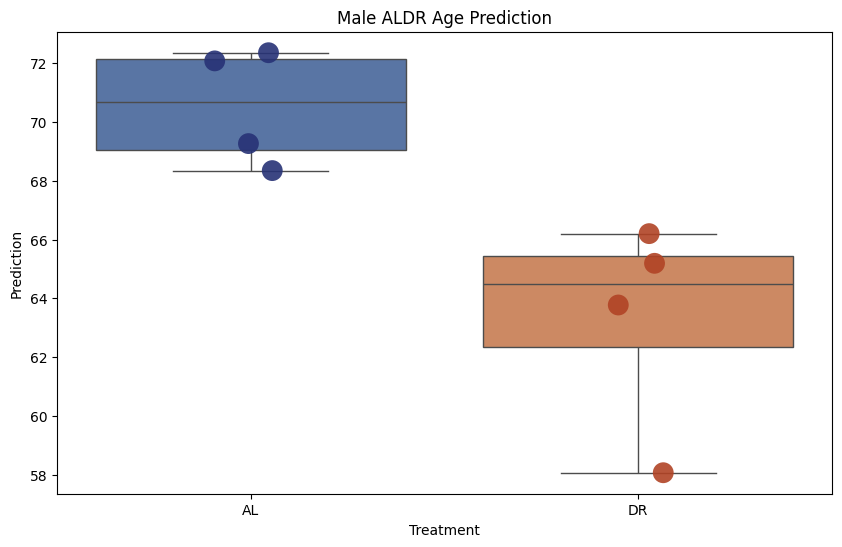

In [ ]:
random.seed(42)
# Create the box plot
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='treatment', y='y_pred', hue='treatment', data=df, palette='deep', showfliers = False, whis = [0,100])

# Add data points
custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


# Add data points with custom colors
strip = sns.stripplot(
    x='treatment',
    y='y_pred',
    hue='treatment',
    data=df,
    palette=custom_palette,  # Custom color palette
    dodge=False,
    alpha=0.9,
    jitter=True,
    size=15
)

# Remove the legend if not needed
#strip.legend_.remove()

# Customize the plot
plt.title('Male ALDR Age Prediction')
plt.xlabel('Treatment')
plt.ylabel('Prediction')

# Remove the grid
plt.grid(False)

plt.savefig("./outputs/elastic_net/liver_male_EN_cr_redo.svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
df
# Save the predictions
df.to_csv("./outputs/elastic_net/liver_male_EN_ALDR_predictions_redo.csv")

##### Median adjusted

In [ ]:
male_plot_data = df
print(male_plot_data)

  Unnamed: 0     y_pred treatment
0   m_AL_L_1  72.350952        AL
1   m_DR_L_1  65.191878        DR
2   m_AL_L_2  72.073457        AL
3   m_DR_L_2  63.774889        DR
4   m_DR_L_3  66.201060        DR
5   m_AL_L_3  69.261796        AL
6   m_DR_L_4  58.072862        DR
7   m_AL_L_4  68.343604        AL


In [ ]:
#median adjusted
median_male_cr = male_plot_data[male_plot_data['treatment'] == 'AL']['y_pred'].median()
print(median_male_cr)

male_plot_data['prediction_med_adjust'] = male_plot_data['y_pred'] - median_male_cr
print(male_plot_data)
male_plot_data.to_csv("./outputs/elastic_net/liver_male_EN_ALDR_predictions_medianadjusted_redo.csv")

70.66762658169849
  Unnamed: 0     y_pred treatment  prediction_med_adjust
0   m_AL_L_1  72.350952        AL               1.683326
1   m_DR_L_1  65.191878        DR              -5.475748
2   m_AL_L_2  72.073457        AL               1.405830
3   m_DR_L_2  63.774889        DR              -6.892738
4   m_DR_L_3  66.201060        DR              -4.466566
5   m_AL_L_3  69.261796        AL              -1.405830
6   m_DR_L_4  58.072862        DR             -12.594765
7   m_AL_L_4  68.343604        AL              -2.324023


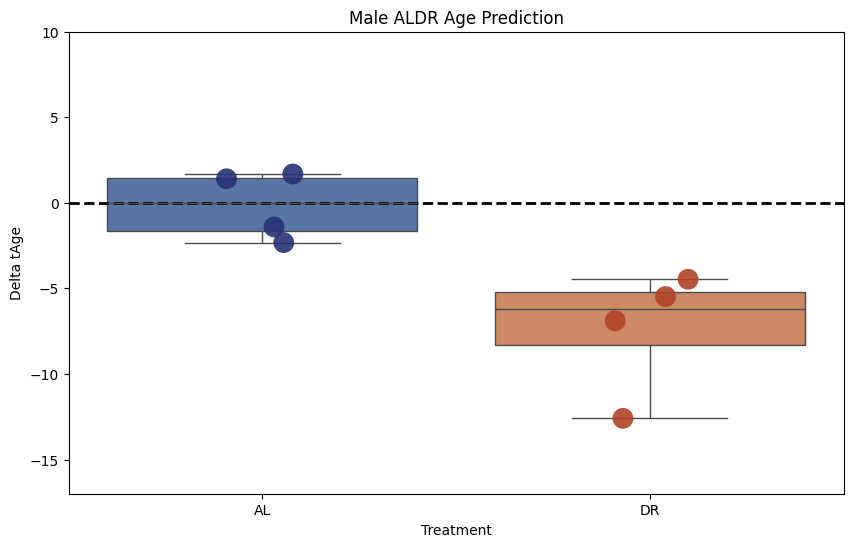

In [ ]:
random.seed(42)
# Create the box plot
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='treatment', y='prediction_med_adjust', hue='treatment', data=male_plot_data, palette='deep', showfliers = False, whis = [0,100])

# Add data points
custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


# Add data points with custom colors
strip = sns.stripplot(
    x='treatment',
    y='prediction_med_adjust',
    hue='treatment',
    data=male_plot_data,
    palette=custom_palette,  # Custom color palette
    dodge=False,
    alpha=0.9,
    jitter=True,
    size=15
)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2)


# Customize the plot
plt.title('Male ALDR Age Prediction')
plt.xlabel('Treatment')
plt.ylabel('Delta tAge')

# Set y-axis limits
plt.ylim(-17, 10)

# Remove the grid
plt.grid(False)

plt.savefig("./outputs/elastic_net/liver_male_EN_CR_medianadjusted_redo.svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

### Female

In [ ]:
df_cr_age_liver_female = df_cr_age_liver[df_cr_age_liver["sex"] == "f"]

df_cr_age_liver_female.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,AL,Liver,f
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,AL,Liver,f
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,DR,Liver,f
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084,DR,Liver,f
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136,AL,Liver,f


In [ ]:
df_cr_age_liver_female = df_cr_age_liver_female.iloc[:,:-3]

df_cr_age_liver_female.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107393324,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,3.196990,1459.958969,1.065663,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1.682535,5838.394970,1.682535,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,0.826384,1765.982416,0.826384,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,1.071467,1749.705454,1.071467,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,1.053069,5136.870264,1.053069,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136


In [ ]:
df_cr_age_liver_female_norm = df_cr_age_liver_female.copy()

In [ ]:
df_metadata = pd.read_csv("./Data_from_Others/ALDR/ExperimentDesign_ALDR.csv")
df_metadata = df_metadata.set_index('item')
df_metadata['animal_feeding'] = df_metadata['animal'] + '_' + df_metadata['feeding']
print(df_metadata)
df_metadata_female_liver = df_metadata[(df_metadata['sex'] == 'f') & (df_metadata['tissue'] == 'L')]
print(df_metadata_female_liver)

                 lib Condition Sample_name_short Sample_name_long animal sex  \
item                                                                           
f_AL_L_1    f_AL_L_1    f_AL_L               EC1      DR20_AL_L_f   DR20   f   
m_AL_L_1    m_AL_L_1    m_AL_L              EC10      DR28_AL_L_m   DR28   m   
f_AL_BR_1  f_AL_BR_1   f_AL_BR              EC13      DR9_AL_BR_f    DR9   f   
m_DR_L_1    m_DR_L_1    m_DR_L              EC14       DR7_DR_L_m    DR7   m   
f_DR_BR_1  f_DR_BR_1   f_DR_BR              EC17     DR17_DR_BR_f   DR17   f   
f_AL_L_2    f_AL_L_2    f_AL_L              EC18       DR5_AL_L_f    DR5   f   
f_DR_L_1    f_DR_L_1    f_DR_L              EC20      DR15_DR_L_f   DR15   f   
f_AL_BR_2  f_AL_BR_2   f_AL_BR              EC21     DR20_AL_BR_f   DR20   f   
m_AL_BR_1  m_AL_BR_1   m_AL_BR              EC22     DR28_AL_BR_m   DR28   m   
m_DR_BR_1  m_DR_BR_1   m_DR_BR              EC24     DR31_DR_BR_m   DR31   m   
m_AL_L_2    m_AL_L_2    m_AL_L          

In [ ]:
df_metadata_3 = pd.read_csv("./Data_from_Others/ALDR/elife-69008-fig5-data1-v2.csv")
df_metadata_3['animal_feeding'] = df_metadata_3['AnimalID']
df_metadata_3['age'] = df_metadata_3['Age at Harvest (days)']
df_metadata_3 = df_metadata_3[df_metadata_3['Sex'] == 'f']
print(df_metadata_3)

  AnimalID Sex CollectionDate CocoDate HatchDate PlacedIn2.8L  \
0   DR5_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
1   DR9_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
2  DR20_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
3  DR34_AL   f       10/21/21  11/4/21  11/18/21     12/18/21   
4  DR17_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
5  DR19_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
6  DR15_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   
7   DR2_DR   f       10/21/21  11/4/21  11/18/21     12/18/21   

   Age at Upgrade (days) Condition  Age at Harvest (days) HarvestDate  \
0                     30        AL                     66     1/23/22   
1                     30        AL                     66     1/23/22   
2                     30        AL                     65     1/22/22   
3                     30        AL                     65     1/22/22   
4                     30        DR               

In [ ]:
# look up the age of the samples...
df_metadata_female_liver = df_metadata_female_liver.merge(
    df_metadata_3[['animal_feeding', 'age']],  # Select only the columns you need from df_metadata_2
    on='animal_feeding',                      # Column to match
    how='left'                                # Keep all rows from df_metadata_male_liver
)
#df_metadata_male_liver = df_metadata_male_liver.set_index('lib')

print(df_metadata_female_liver)

        lib Condition Sample_name_short Sample_name_long animal sex feeding  \
0  f_AL_L_1    f_AL_L               EC1      DR20_AL_L_f   DR20   f      AL   
1  f_AL_L_2    f_AL_L              EC18       DR5_AL_L_f    DR5   f      AL   
2  f_DR_L_1    f_DR_L              EC20      DR15_DR_L_f   DR15   f      DR   
3  f_DR_L_2    f_DR_L               EC8      DR17_DR_L_f   DR17   f      DR   
4  f_AL_L_3    f_AL_L               JC1      DR34_AL_L_f   DR34   f      AL   
5  f_AL_L_4    f_AL_L              JC18       DR9_AL_L_f    DR9   f      AL   
6  f_DR_L_3    f_DR_L              JC20      DR19_DR_L_f   DR19   f      DR   
7  f_DR_L_4    f_DR_L               JC6       DR2_DR_L_f    DR2   f      DR   

  tissue animal_tissue RNA_ID harvest_batch  \
0      L     DR20_AL_L    EC1       1/22/22   
1      L      DR5_AL_L   EC18       1/23/22   
2      L     DR15_DR_L   EC20       1/22/22   
3      L     DR17_DR_L    EC8       1/23/22   
4      L     DR34_AL_L    JC1       1/22/22   
5     

In [ ]:
# Assuming `count_matrix` is your count matrix DataFrame
# Set the row names of count_matrix as a column temporarily for merging
df_cr_age_liver_female_norm['sample_id'] = df_cr_age_liver_female_norm.index

# Merge count_matrix with df_metadata_male_liver on the sample ID and 'lib' column
df_cr_age_liver_female_norm = df_cr_age_liver_female_norm.merge(
    df_metadata_female_liver[['lib', 'age']],  # Select only the columns needed from df_metadata_male_liver
    left_on='sample_id',                     # Match sample_id in count_matrix
    right_on='lib',                          # Match lib in df_metadata_male_liver
    how='left'                               # Keep all rows in count_matrix
)

# Drop the temporary 'lib' column (optional)
df_cr_age_liver_female_norm.drop(columns=['lib'], inplace=True)

# Restore the sample_id column as the index
df_cr_age_liver_female_norm.set_index('sample_id', inplace=True)

# Verify the result
print(df_cr_age_liver_female_norm.head())

           LOC107375582  LOC107388276  LOC107382448  LOC107377727        pex1  \
sample_id                                                                       
f_AL_L_1       1.065663      1.065663      2.131327    188.622436  152.389878   
f_AL_L_2       1.682535      1.682535      1.682535     11.777742  215.364425   
f_DR_L_1       0.826384      0.826384      0.826384     15.701294  376.831063   
f_DR_L_2       1.071467      1.071467      1.071467     39.644275  259.294991   
f_AL_L_3       1.053069      1.053069      1.053069     35.804344  354.884231   

           LOC107393665  LOC107377394      zbtb41  LOC107377691       tuba4a  \
sample_id                                                                      
f_AL_L_1       9.590971      1.065663  101.238031    411.346104   902.616968   
f_AL_L_2       5.047604      5.047604   31.968157    464.379542   792.473784   
f_DR_L_1      32.228973      0.826384  123.131203    187.589148  2644.428513   
f_DR_L_2      26.786673      1.0

In [ ]:
df_cr_age_liver_female_norm.head(5)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,chp1,LOC107392884,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,age
sample_id,,,,,,,,,,,,,,,,,,,,,
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,1459.958969,1.065663,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,65
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,5838.394970,1.682535,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,66
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,1765.982416,0.826384,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,65
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,1749.705454,1.071467,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084,66
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,5136.870264,1.053069,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136,65


In [ ]:
liver_df_female = liver_df.loc[liver_df.iloc[:,-3] == "F"]

In [ ]:
liver_df_female["age_days"].value_counts()

,count
age_days,
52,2
133,2
102,2
134,2
147,2
78,2
47,2
49,2
75,2


In [ ]:
liver_df_female.head(5)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,sex,tissue,age_days
A6_1,43882.858900,853.088237,19132.800486,1147.075568,81.371493,1433.188238,1212.697740,1622.180093,1532.933939,713.969232,...,118.119910,2543.515389,307.111765,425.231675,2302.025796,782.216291,577.475114,F,Liver,52
A7_1,46308.620187,503.876178,3746.507910,867.215463,126.825977,1144.861521,1357.380725,1669.304073,970.047336,647.840801,...,41.132749,3033.540256,3.427729,414.755222,3191.215795,586.141677,661.551717,F,Liver,133
B5_1,50060.335020,509.903707,3616.007271,556.585032,32.317841,1037.761769,1052.125254,1658.982482,1138.306162,621.220713,...,25.136098,2007.296986,3.590871,373.450602,2330.475391,570.948516,416.541056,F,Liver,102
B6_1,52010.405793,439.314180,3444.223173,593.074143,74.683411,1107.071734,926.952920,1555.172198,760.013532,733.654681,...,39.538276,3088.378687,4.393142,487.638740,1871.478408,505.211307,544.749583,F,Liver,134
B8_1,57870.342592,385.596632,4719.702781,704.356515,66.836750,776.334553,1033.398975,1269.898243,1043.681552,622.095900,...,87.401903,2035.950219,35.989019,493.563689,1300.745973,426.726940,483.281113,F,Liver,133


In [ ]:
liver_df_female.shape

(23, 25125)

In [ ]:
age_days_value_counts = liver_df_female["age_days"].value_counts().index.tolist()

print(sorted(age_days_value_counts))

[47, 49, 52, 75, 77, 78, 102, 103, 133, 134, 147, 155]


In [ ]:
liver_gene_expression_data_female = liver_df_female.iloc[:, :-3]

In [ ]:
liver_df_female_age = liver_gene_expression_data_female.copy()

liver_df_female_age.head(3)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim6,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3
A6_1,43882.858900,853.088237,19132.800486,1147.075568,81.371493,1433.188238,1212.697740,1622.180093,1532.933939,713.969232,...,181.117195,191.616742,1007.956563,118.119910,2543.515389,307.111765,425.231675,2302.025796,782.216291,577.475114
A7_1,46308.620187,503.876178,3746.507910,867.215463,126.825977,1144.861521,1357.380725,1669.304073,970.047336,647.840801,...,140.536893,202.236017,1336.814350,41.132749,3033.540256,3.427729,414.755222,3191.215795,586.141677,661.551717
B5_1,50060.335020,509.903707,3616.007271,556.585032,32.317841,1037.761769,1052.125254,1658.982482,1138.306162,621.220713,...,118.498749,157.998332,1116.760935,25.136098,2007.296986,3.590871,373.450602,2330.475391,570.948516,416.541056


In [ ]:
liver_df_female_age["age"] = liver_df_female["age_days"].tolist()

liver_df_female_age.head(3)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,age
A6_1,43882.858900,853.088237,19132.800486,1147.075568,81.371493,1433.188238,1212.697740,1622.180093,1532.933939,713.969232,...,191.616742,1007.956563,118.119910,2543.515389,307.111765,425.231675,2302.025796,782.216291,577.475114,52
A7_1,46308.620187,503.876178,3746.507910,867.215463,126.825977,1144.861521,1357.380725,1669.304073,970.047336,647.840801,...,202.236017,1336.814350,41.132749,3033.540256,3.427729,414.755222,3191.215795,586.141677,661.551717,133
B5_1,50060.335020,509.903707,3616.007271,556.585032,32.317841,1037.761769,1052.125254,1658.982482,1138.306162,621.220713,...,157.998332,1116.760935,25.136098,2007.296986,3.590871,373.450602,2330.475391,570.948516,416.541056,102


In [ ]:
# Find common columns between the two DataFrames
common_columns = liver_df_female_age.columns.intersection(df_cr_age_liver_female_norm.columns)

# Select only the common columns from both DataFrames
liver_df_female_age_common = liver_df_female_age[common_columns]
df_cr_age_liver_female_norm_common = df_cr_age_liver_female_norm[common_columns]

# Concatenate the DataFrames with the same columns
liver_df_female_cr_female = pd.concat([liver_df_female_age_common, df_cr_age_liver_female_norm_common], axis=0)

In [ ]:
liver_df_female_cr_female.head(10)

,a1cf,aaas,aacs,aadat,aaed1,aagab,aak1,aamdc,aamp,aar2,...,zswim7,zswim8,zufsp,zw10,zwilch,zyg11b,zyx,zzef1,zzz3,age
A6_1,43882.858900,853.088237,19132.800486,1147.075568,81.371493,1433.188238,1212.697740,1622.180093,1532.933939,713.969232,...,191.616742,1007.956563,118.119910,2543.515389,307.111765,425.231675,2302.025796,782.216291,577.475114,52
A7_1,46308.620187,503.876178,3746.507910,867.215463,126.825977,1144.861521,1357.380725,1669.304073,970.047336,647.840801,...,202.236017,1336.814350,41.132749,3033.540256,3.427729,414.755222,3191.215795,586.141677,661.551717,133
B5_1,50060.335020,509.903707,3616.007271,556.585032,32.317841,1037.761769,1052.125254,1658.982482,1138.306162,621.220713,...,157.998332,1116.760935,25.136098,2007.296986,3.590871,373.450602,2330.475391,570.948516,416.541056,102
B6_1,52010.405793,439.314180,3444.223173,593.074143,74.683411,1107.071734,926.952920,1555.172198,760.013532,733.654681,...,101.042261,856.662651,39.538276,3088.378687,4.393142,487.638740,1871.478408,505.211307,544.749583,134
B8_1,57870.342592,385.596632,4719.702781,704.356515,66.836750,776.334553,1033.398975,1269.898243,1043.681552,622.095900,...,303.336017,925.431918,87.401903,2035.950219,35.989019,493.563689,1300.745973,426.726940,483.281113,133
C6_1,47984.562591,858.602909,19799.707089,605.882053,55.080187,1046.523546,1072.443634,1389.964710,1590.845390,686.882327,...,90.720307,1130.763831,106.920362,2361.968003,178.200604,320.761087,2089.807081,631.802141,476.281614,52
D7_1,67424.185356,556.809238,15745.327910,796.546549,73.467886,931.882128,1179.352901,1871.497718,804.280011,479.474622,...,143.069040,912.548474,92.801540,1600.826561,27.067116,634.143855,2002.966566,421.473660,545.209046,147
E6_1,63081.109900,597.464257,6752.735553,719.736012,141.724080,947.606100,928.153776,1297.747944,1217.159742,603.022064,...,69.472588,975.395135,97.261623,1267.180005,25.010132,408.498817,2576.043563,464.076888,408.498817,134
E8_1,54598.001812,466.518856,3303.871240,783.904635,57.358876,1166.297139,1284.838816,1636.639920,944.509486,676.834733,...,156.780927,936.861636,110.893826,1781.949072,19.119625,416.807830,2588.797256,558.293057,439.751380,147
G5_1,49741.618891,708.784412,8291.589712,633.550312,75.234100,1243.342488,1211.664972,1381.931619,1136.430873,601.872797,...,340.533293,1104.753357,83.153478,2213.466403,91.072857,542.477455,1987.764105,673.147207,344.492982,78


In [ ]:
liver_df_female_cr_female_atlas = liver_df_female_cr_female.loc[liver_df_female.index.tolist(),]

In [ ]:
data_atlas = liver_df_female_cr_female_atlas.values

In [ ]:
X, y = data_atlas[:,:-1], data_atlas[:,-1]

y

array([ 52., 133., 102., 134., 133.,  52., 147., 134., 147.,  78.,  47.,
        47.,  78.,  49.,  49.,  75.,  75., 155., 155.,  77.,  77., 102.,
       103.])

In [ ]:
data_cr = liver_df_female_cr_female.loc[df_cr_age_liver_female.index.tolist(), ]

In [ ]:
data_cr_values = data_cr.values

In [ ]:
X_cr = data_cr_values[:,:-1]

In [ ]:
# Set the random seed
seed = 42

#this part will take awhile

# Define the parameter grid
param_grid = {
    'alpha': [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1.0, 10.0, 100.0],
    'l1_ratio': np.arange(0, 1.1, 0.1)
}

# Define the model
model = ElasticNet(max_iter=10000, random_state=seed)

# Define Leave-One-Out cross-validation
loo = LeaveOneOut()

# Set up GridSearchCV
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=loo, scoring='neg_mean_absolute_error', n_jobs=-1)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Fit the GridSearchCV
grid_search.fit(X_scaled, y)

# Get the best parameters
best_params = grid_search.best_params_
print("Best parameters found: ", best_params)

# Train the model with the best parameters using Leave-One-Out cross-validation
y_true = []
y_pred = []

for train_index, test_index in loo.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    best_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
    best_model.fit(X_train_scaled, y_train)

    y_test_pred = best_model.predict(X_test_scaled)

    y_true.append(y_test[0])
    y_pred.append(y_test_pred[0])

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Calculate the Pearson correlation coefficient
pearson_corr, _ = pearsonr(y_true, y_pred)

# Calculate the R-squared value
r_squared = r2_score(y_true, y_pred)

# Calculate the mean absolute error
mae = mean_absolute_error(y_true, y_pred)

print(f"MAE: {mae:.3f}")
print(f"Pearson correlation: {pearson_corr:.3f}")
print(f"R-squared: {r_squared:.3f}")

# Retrain the model on the full dataset using the best parameters
X_full_scaled = scaler.fit_transform(X)
final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
final_model.fit(X_full_scaled, y)

# Scale the test data (X_cr)
X_cr_scaled = scaler.transform(X_cr)

# Predict the target values for the test data
y_cr_pred = final_model.predict(X_cr_scaled)

# Output the predictions for the test data
print("Predictions for X_cr: ", y_cr_pred)

Best parameters found:  {'alpha': 0.1, 'l1_ratio': 1.0}
MAE: 16.953
Pearson correlation: 0.848
R-squared: 0.702
Predictions for X_cr:  [60.21054571 37.18237013 49.34477492 50.04096276 52.06964189 52.90748241
 54.57240874 41.09186284]


In [ ]:
# Retrain the model on the full dataset using the best parameters
# X_full_scaled = scaler.fit_transform(X)
# final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
# final_model.fit(X_full_scaled, y)

# # Extract the coefficients
# coefficients = final_model.coef_

# # Count non-zero coefficients
# non_zero_count = np.sum(coefficients != 0)
# print(f"Number of non-zero coefficients: {non_zero_count}")

# # Scale the test data (X_cr)
# X_cr_scaled = scaler.transform(X_cr)

# # Predict the target values for the test data
# y_cr_pred = final_model.predict(X_cr_scaled)

# # Output the predictions for the test data
# print("\nPredictions for X_cr: ", y_cr_pred)

Number of non-zero coefficients: 24

Predictions for X_cr:  [60.21054571 37.18237013 49.34477492 50.04096276 52.06964189 52.90748241
 54.57240874 41.09186284]


In [ ]:
# Retrain the model on the full dataset using the best parameters
X_full_scaled = scaler.fit_transform(X)
final_model = ElasticNet(alpha=best_params['alpha'], l1_ratio=best_params['l1_ratio'], max_iter=100000, random_state=seed)
final_model.fit(X_full_scaled, y)

# Extract the coefficients
coefficients = final_model.coef_

# Identify non-zero coefficient indices
non_zero_indices = np.where(coefficients != 0)[0]

# Map indices to gene names from data_cr
non_zero_genes = list(data_cr.columns[non_zero_indices])

# Print the list of genes with non-zero coefficients
print("Genes with non-zero coefficients:")
print(non_zero_genes)
print(len(non_zero_genes))

Genes with non-zero coefficients:
['crispld1', 'hand1', 'kiaa0586', 'LOC107373129', 'LOC107374380', 'LOC107376103', 'LOC107377204', 'LOC107377205', 'LOC107379623', 'LOC107382822', 'LOC107384626', 'LOC107384947', 'LOC107385403', 'LOC107387904', 'LOC107391198', 'LOC107392368', 'LOC107396751', 'LOC107397275', 'negr1', 'nptx1', 'pax5', 'pkd1l1', 'pmp22', 'skil']
24


In [ ]:
non_zero_genes_df_fem = ['crispld1', 'hand1', 'kiaa0586', 'LOC107373129', 'LOC107374380', 'LOC107376103', 'LOC107377204', 'LOC107377205', 'LOC107379623', 'LOC107382822', 'LOC107384626', 'LOC107384947', 'LOC107385403', 'LOC107387904', 'LOC107391198', 'LOC107392368', 'LOC107396751', 'LOC107397275', 'negr1', 'nptx1', 'pax5', 'pkd1l1', 'pmp22', 'skil']

df = pd.DataFrame(non_zero_genes_df_fem, columns=["genes"])

# Save the DataFrame to a CSV file
output_file = "./outputs/elastic_net/female_non_zero_genes.csv"
df.to_csv(output_file, index=False)

print(f"List has been written to {output_file}")

List has been written to ./output/prediction_genes/female_non_zero_genes.csv


In [ ]:
# Save the list of non-zero genes to a CSV file
genes_df = pd.DataFrame(non_zero_genes, columns=["Gene Name"])
genes_df.to_csv("./outputs/elastic_net/female_non_zero_genes_redo.csv", index=False)

print("Non-zero genes have been saved to 'non_zero_genes.csv'")


Non-zero genes have been saved to 'non_zero_genes.csv'


In [ ]:
df_cr_age_liver_female_norm.shape

(8, 22620)

In [ ]:
# Create a DataFrame
df = pd.DataFrame({
    'y_pred': y_cr_pred,
}, index=data_cr.index.tolist())

df.head(10)

,y_pred
f_AL_L_1,60.210546
f_AL_L_2,37.182370
f_DR_L_1,49.344775
f_DR_L_2,50.040963
f_AL_L_3,52.069642
f_AL_L_4,52.907482
f_DR_L_3,54.572409
f_DR_L_4,41.091863


In [ ]:
df_cr_age_liver_female = df_cr_age_liver[df_cr_age_liver["sex"] == "f"]

df_cr_age_liver_female.head(8)

,LOC107375582,LOC107388276,LOC107382448,LOC107377727,pex1,LOC107393665,LOC107377394,zbtb41,LOC107377691,tuba4a,...,LOC107372821,LOC107386901,LOC107386251,LOC107378151,dag1,LOC107396310,LOC107378249,treatment,tissue,sex
f_AL_L_1,1.065663,1.065663,2.131327,188.622436,152.389878,9.590971,1.065663,101.238031,411.346104,902.616968,...,822.692207,3.196990,596.771549,1.065663,22.378933,41.560876,83.121752,AL,Liver,f
f_AL_L_2,1.682535,1.682535,1.682535,11.777742,215.364425,5.047604,5.047604,31.968157,464.379542,792.473784,...,1068.409454,5.047604,329.776776,1.682535,45.428433,8.412673,42.063364,AL,Liver,f
f_DR_L_1,0.826384,0.826384,0.826384,15.701294,376.831063,32.228973,0.826384,123.131203,187.589148,2644.428513,...,2487.415570,0.826384,379.310215,14.048526,14.048526,12.395759,13.222143,DR,Liver,f
f_DR_L_2,1.071467,1.071467,1.071467,39.644275,259.294991,26.786673,1.071467,155.362701,296.796332,1856.852144,...,2045.430319,7.500268,326.797406,9.643202,22.500805,5.357335,78.217084,DR,Liver,f
f_AL_L_3,1.053069,1.053069,1.053069,35.804344,354.884231,9.477620,5.265345,118.996790,223.250614,1613.301608,...,1268.948067,5.265345,390.688575,11.583758,26.326723,7.371483,63.184136,AL,Liver,f
f_AL_L_4,1.044274,1.044274,1.044274,109.648747,296.573754,3.132821,3.132821,73.099165,358.185907,933.580761,...,854.215954,4.177095,307.016492,3.132821,26.106845,17.752654,3.132821,AL,Liver,f
f_DR_L_3,1.253454,1.253454,1.253454,43.870890,304.589324,18.801810,1.253454,166.709383,312.110048,1393.840855,...,2213.599775,3.760362,279.520243,11.281086,26.322534,6.267270,72.700332,DR,Liver,f
f_DR_L_4,1.170773,1.170773,1.170773,71.417142,313.767115,28.098548,3.512318,206.056016,351.231845,536.213950,...,827.736381,5.853864,362.939573,8.195410,22.244683,8.195410,3.512318,DR,Liver,f


In [ ]:
df["treatment"] = df_cr_age_liver_female["treatment"]

df.head(3)

,y_pred,treatment
f_AL_L_1,60.210546,AL
f_AL_L_2,37.182370,AL
f_DR_L_1,49.344775,DR


In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

In [ ]:
# Ensure predictions are numeric
pred_al = pd.to_numeric(df[df['treatment'] == "AL"]['y_pred'], errors='coerce')
pred_dr = pd.to_numeric(df[df['treatment'] == "DR"]['y_pred'], errors='coerce')

# Drop any NaN values if necessary
pred_al = pred_al.dropna()
pred_dr = pred_dr.dropna()

# Perform t-test
t_stat, p_ttest = ttest_ind(pred_al, pred_dr, equal_var=False)  # Welch's t-test for unequal variances

# Perform Mann-Whitney U test
u_stat, p_mwu = mannwhitneyu(pred_al, pred_dr, alternative='two-sided')

# Print results
print(f"T-test p-value: {p_ttest}")
print(f"Mann-Whitney U test p-value: {p_mwu}")

T-test p-value: 0.7569608937995495
Mann-Whitney U test p-value: 0.6857142857142857


In [ ]:
# Filter the DataFrame to include only rows where true_age is 105
filtered_df_al = df[df['treatment'] == "AL"]
filtered_df_dr = df[df['treatment'] == "DR"]

# Display the filtered DataFrame
print(filtered_df_al)

             y_pred treatment
f_AL_L_1  60.210546        AL
f_AL_L_2  37.182370        AL
f_AL_L_3  52.069642        AL
f_AL_L_4  52.907482        AL


In [ ]:
df

,y_pred,treatment
f_AL_L_1,60.210546,AL
f_AL_L_2,37.182370,AL
f_DR_L_1,49.344775,DR
f_DR_L_2,50.040963,DR
f_AL_L_3,52.069642,AL
f_AL_L_4,52.907482,AL
f_DR_L_3,54.572409,DR
f_DR_L_4,41.091863,DR


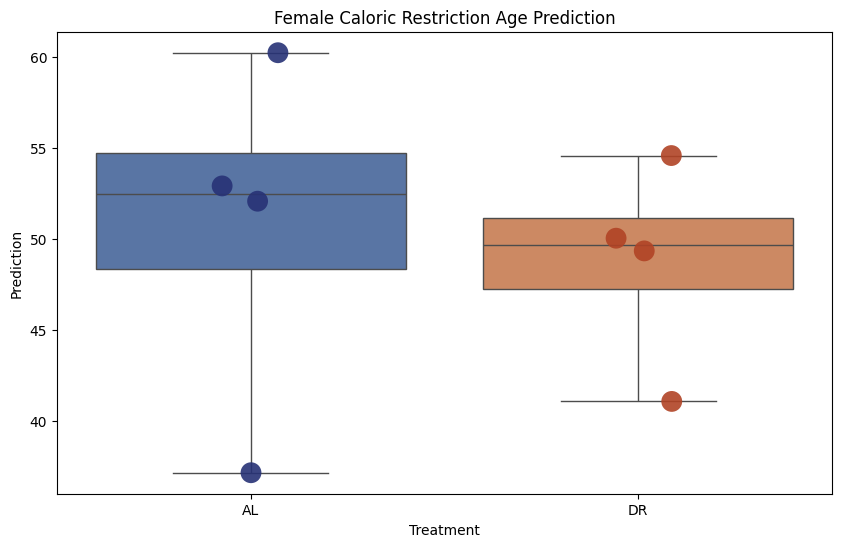

In [ ]:
random.seed(42)

# Create the box plot
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='treatment', y='y_pred', hue='treatment', data=df, palette='deep', showfliers = False, whis = [0,100])

# Add data points
custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


# Add data points with custom colors
strip = sns.stripplot(
    x='treatment',
    y='y_pred',
    hue='treatment',
    data=df,
    palette=custom_palette,  # Custom color palette
    dodge=False,
    alpha=0.9,
    jitter=True,
    size=15
)

# Remove the legend if not needed
#strip.legend_.remove()

# Customize the plot
plt.title('Female Caloric Restriction Age Prediction')
plt.xlabel('Treatment')
plt.ylabel('Prediction')

# Remove the grid
plt.grid(False)

plt.savefig("./outputs/elastic_net/liver_female_EN_cr_redo.svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()

In [ ]:
df
# Save the predictions
df.to_csv("./outputs/elastic_net/liver_female_EN_ALDR_predictions_redo.csv")

##### Median adjusted

In [ ]:
female_plot_data = df
print(female_plot_data)

  Unnamed: 0     y_pred treatment
0   f_AL_L_1  60.210546        AL
1   f_AL_L_2  37.182370        AL
2   f_DR_L_1  49.344775        DR
3   f_DR_L_2  50.040963        DR
4   f_AL_L_3  52.069642        AL
5   f_AL_L_4  52.907482        AL
6   f_DR_L_3  54.572409        DR
7   f_DR_L_4  41.091863        DR


In [ ]:
median_fem_cr = female_plot_data[female_plot_data['treatment'] == 'AL']['y_pred'].median()
print(median_fem_cr)

female_plot_data['prediction_med_adjust'] = female_plot_data['y_pred'] - median_fem_cr
print(female_plot_data)
female_plot_data.to_csv("./outputs/elastic_net/liver_female_EN_ALDR_predictions_medianadjusted_redo.csv")

52.48856215258255
  Unnamed: 0     y_pred treatment  prediction_med_adjust
0   f_AL_L_1  60.210546        AL               7.721984
1   f_AL_L_2  37.182370        AL             -15.306192
2   f_DR_L_1  49.344775        DR              -3.143787
3   f_DR_L_2  50.040963        DR              -2.447599
4   f_AL_L_3  52.069642        AL              -0.418920
5   f_AL_L_4  52.907482        AL               0.418920
6   f_DR_L_3  54.572409        DR               2.083847
7   f_DR_L_4  41.091863        DR             -11.396699


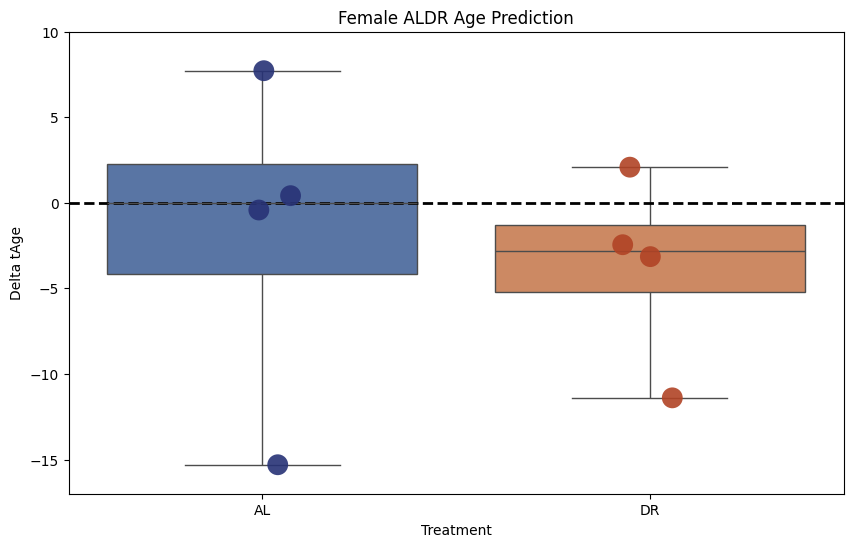

In [ ]:
random.seed(42)

# Create the box plot
plt.figure(figsize=(10, 6))
box = sns.boxplot(x='treatment', y='prediction_med_adjust', hue='treatment', data=female_plot_data, palette='deep', showfliers = False, whis = [0,100])

# Add data points
custom_palette = ['#273276', '#B14325']  # Use desired hex color codes


# Add data points with custom colors
strip = sns.stripplot(
    x='treatment',
    y='prediction_med_adjust',
    hue='treatment',
    data=female_plot_data,
    palette=custom_palette,  # Custom color palette
    dodge=False,
    alpha=0.9,
    jitter=True,
    size=15
)

plt.axhline(y=0, color='black', linestyle='--', linewidth=2)


# Customize the plot
plt.title('Female ALDR Age Prediction')
plt.xlabel('Treatment')
plt.ylabel('Delta tAge')

# Set y-axis limits
plt.ylim(-17, 10)

# Remove the grid
plt.grid(False)

plt.savefig("./outputs/elastic_net/liver_female_EN_CR_medianadjusted_redo.svg", dpi=300, bbox_inches="tight")

# Show the plot
plt.show()